# **Main Motive of this  Exploratory Data Analysis project is:**
1.   handaling the missing values of the data sets.(common)
2.  Handling the outliers
3.   Removing duplicate data
4.   Normalizing and scalling
5.   Data Filtering
6.   Visualization
7.   Correlation











In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path="/content/drive/MyDrive/realstate.csv"
data=pd.read_csv(path)

In [ ]:
data.shape

(2211, 18)

In [ ]:
data.head(2)

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."


In [ ]:
data.tail(2)

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
2209,"House For Rent In Baneshwor, Kathmandu","Bhimsengola, Baneshwor, Kathmandu",Kathmandu,300000,9,3,2.0,4,North,NaN,2.5K,51 Aana,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."
2210,"House For Sale In Baluwatar, Kathmandu","Gocha marg, Baluwatar, Kathmandu",Kathmandu,72500000,5,2,3.0,5,East,NaN,19.6K,13 Aana,12 Feet,12 Feet,NaN,13 Aana,1 year ago,"['Garage', 'Balcony', 'Frontyard', 'Drainage',..."


Fixing Rows and Columns

Missing values



*   Missing completely at random:values doesnot depend on any other features.
*   Missing at random:values may be dependent on some other features
*   Missing not at random:missing values have some reason for why they are missing
*   





In [ ]:
data.isnull().sum()

Title            0
Address          0
City             0
Price            0
Bedroom          0
Bathroom         0
Floors        1172
Parking          0
Face             0
Year          1629
Views            0
Area             0
Road             0
Road Width       0
Road Type      785
Build Area       0
Posted           0
Amenities        0
dtype: int64

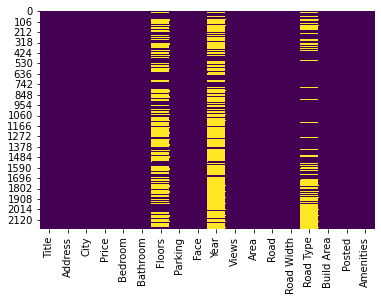

In [ ]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [ ]:
floor=data['Floors'].median()
year=data['Year'].median()
road_score=data['Road Type'].mode()

In [ ]:
data.Floors.fillna(floor,inplace=True)
data.Year.fillna(year,inplace=True)
data['Road Type'].fillna(data['Road Type'].mode(),inplace=True)
                 

Output after clearing missing value

In [ ]:
data.isnull().sum()

Title           0
Address         0
City            0
Price           0
Bedroom         0
Bathroom        0
Floors          0
Parking         0
Face            0
Year            0
Views           0
Area            0
Road            0
Road Width      0
Road Type     785
Build Area      0
Posted          0
Amenities       0
dtype: int64

Asking Questions and Visualization

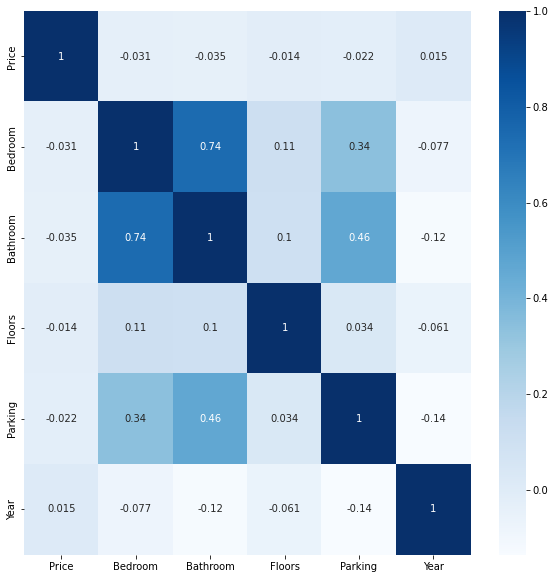

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

Handling Outliers



*   Univariate outliers: this outliers which is beyond the range of expected values based on one variable
*   **Multivariate**:while plotting the data  values of one variable may lie beyonfd the  expected  range or value may lie far from the expected value





*   univariate Analysis: analyze over the sing;e variable and column  from the  dataset
      *  Categorical unordered Univariate Analysis:variable that has no defined ordered.if we taken out data as an example the job colum which which means job categories like where jobless,technicia,police.
      *   Categorical ordered univariate Analysis:ordered variables those variables that have a natural rank of order  and some of categorical orderd are month, education:primary,Secondary



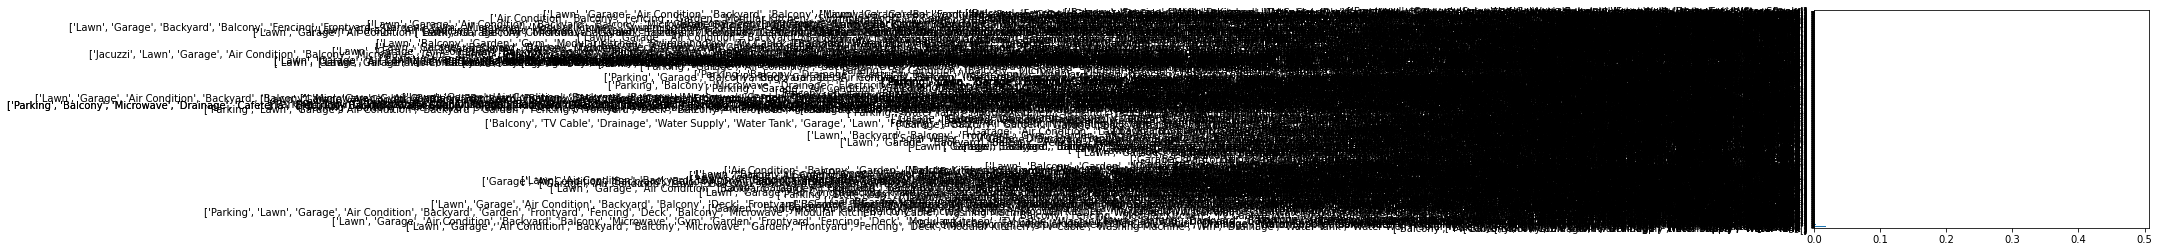

In [ ]:

# calculate the percentage of amenities categories
data.Amenities.value_counts(normalize=True)
# plot the bar graph of a amenities
data.Amenities.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
# data.Title.value_counts().plot.pie()
# plt.show()

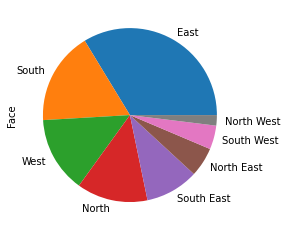

In [ ]:
#plot the  percentage of a  face
data.Face.value_counts(normalize=True).plot.pie()
plt.show()

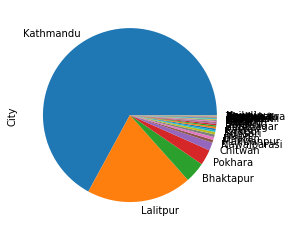

In [ ]:
data.City.value_counts(normalize=True).plot.pie()
plt.show()

in univariate categorical analysis if the column or variable is of numerical  then  we will analyze  by calculating the mean , median,std we  can get  those values by using the describe function.

In [ ]:
data.Price.describe()

count    2.211000e+03
mean     4.064428e+11
std      7.564269e+12
min      1.500000e+01
25%      1.300000e+06
50%      8.000000e+06
75%      2.650000e+07
max      2.160000e+14
Name: Price, dtype: float64

Bivariate Analysis

we analyze the data by taking two variables/columns from datasets


*   **Numeric Numeric Analysis** analyze the two numeric values from a datasets.we can analyze by using three different ways which are  scatter plot ,pairplot,correlation matrix.


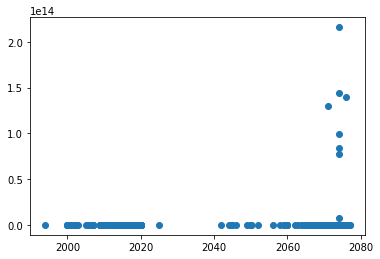

In [ ]:
plt.scatter(data.Year,data.Price)
plt.show()


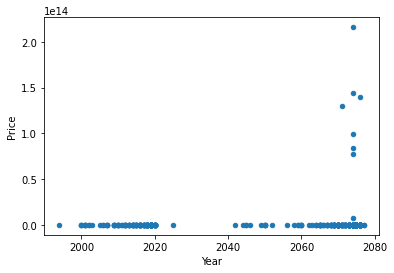

In [ ]:
data.plot.scatter(x='Year',y='Price')

Text(0.5, 1.0, 'Analyzing data of 4 popular Cities')

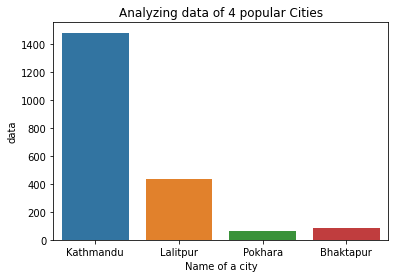

In [ ]:
data.City.value_counts()
data_fil=data[data.City.isin(['Kathmandu','Pokhara','Lalitpur','Bhaktapur'])]
ax=sns.countplot(x='City',data=data_fil)
plt.xlabel('Name of a city')
plt.ylabel('data')
plt.title('Analyzing data of 4 popular Cities')

In [ ]:
ac=data[data.City.isin(['Kathmandu'])]
ac

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,"House For Rent In Chapali, Kathmandu","Bhangal, Chapali, Kathmandu",Kathmandu,500000,5,5,3.0,5,North East,2074.0,3.1K,1 Ropani,16 Feet,16 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Garden', 'Drainage',..."
2207,"House For Sale In Sitapaila, Kathmandu","Nagarjun, Sitapaila, Kathmandu",Kathmandu,12000000,4,2,2.0,1,North East,2074.0,1.4K,2.5 Aana,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2208,"House For Sale In Budhanilkantha, Kathmandu","Deuja Chowk, Budhanilkantha, Kathmandu",Kathmandu,27000000,5,3,2.0,1,East,2071.0,1.5K,8 Aana,12 Feet,12 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2209,"House For Rent In Baneshwor, Kathmandu","Bhimsengola, Baneshwor, Kathmandu",Kathmandu,300000,9,3,2.0,4,North,2074.0,2.5K,51 Aana,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."


Pair Plot

In [ ]:
# sns.pairplot(data=data,vars=['City','Price'])
# plt.show()

Correlation Matrix

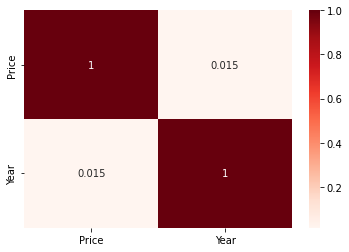

In [ ]:
#creating a matrix using Year,Price
data[['Price','Year']].corr()
#plot the correlation matrix of above differnt variables
sns.heatmap(data[['Price','Year']].corr(),annot=True,cmap='Reds')
plt.show()

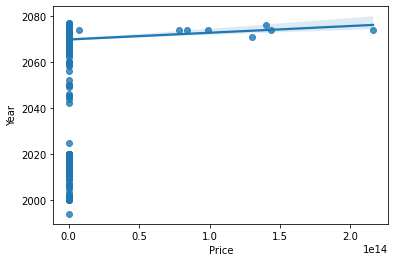

In [ ]:
sns.regplot(x='Price',y='Year',data=data)


**Numeric Categorical Analysis:**where one numerical and one categorical variable from a dataset which is known as numeric categorical analysis we mainly calculated using by mean ,median and boxplots.

In [ ]:
data.groupby('Address')['Price'].mean()

Address
024, Budhanilkantha, Kathmandu                                      35000000.0
10, Sipadol, Bhaktapur                                                    15.0
104 Continental Homes, Narayantar, Jorpati-6, Jorpati, Kathmandu    24000000.0
104, Panchashil Galli,, Gairigaun, Kathmandu                        80000000.0
12 D Uranus Tower, Dhapasi, Kathmandu                                  60000.0
                                                                       ...    
tokha road , saraswoti 3, Tokha, Kathmandu                          30000000.0
townplanning, Samakhusi, Kathmandu                                    750000.0
uttar dokha, Lazimpat, Kathmandu                                      150000.0
vinayak colony, Bhaisepati, Lalitpur                                   60000.0
टिकाभैरब कोटडाॅडा रोड, Godawari, Lalitpur                             350000.0
Name: Price, Length: 1588, dtype: float64

In [ ]:
data.groupby('Address')['Price'].median()

Address
024, Budhanilkantha, Kathmandu                                      35000000.0
10, Sipadol, Bhaktapur                                                    15.0
104 Continental Homes, Narayantar, Jorpati-6, Jorpati, Kathmandu    24000000.0
104, Panchashil Galli,, Gairigaun, Kathmandu                        80000000.0
12 D Uranus Tower, Dhapasi, Kathmandu                                  60000.0
                                                                       ...    
tokha road , saraswoti 3, Tokha, Kathmandu                          30000000.0
townplanning, Samakhusi, Kathmandu                                    750000.0
uttar dokha, Lazimpat, Kathmandu                                      150000.0
vinayak colony, Bhaisepati, Lalitpur                                   60000.0
टिकाभैरब कोटडाॅडा रोड, Godawari, Lalitpur                             350000.0
Name: Price, Length: 1588, dtype: float64

In [ ]:
cit_fil=data[data.City.isin(['Kathmandu','Pokhara','Bhaktapur','Lalitpur'])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


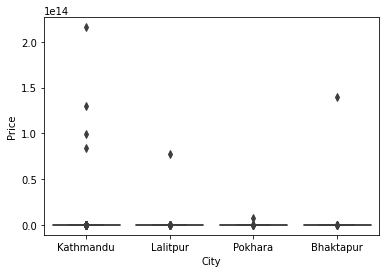

In [ ]:
sns.boxplot('City','Price',data=cit_fil)
plt.show()

Calculating IQR

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


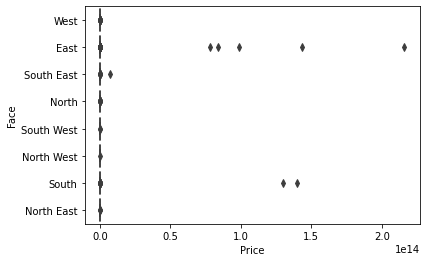

In [ ]:
sns.boxplot(data.Price,data.Face)
plt.show()

***Categorical  Analysis***:target variable is price here  wecan easily see how categorical are associated  with  price.

<function matplotlib.pyplot.show>

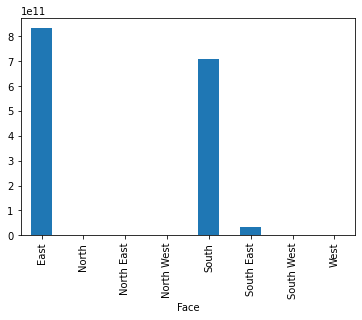

In [ ]:
# plot the bar graph of face and average value of a price 
data.groupby('Face')['Price'].mean().plot.bar()
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


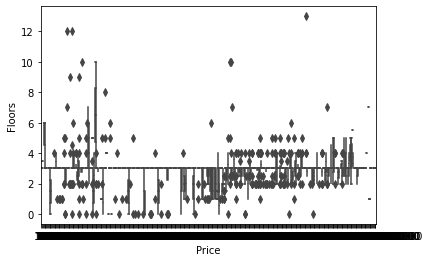

In [ ]:
sns.boxplot('Price','Floors',data=data)

Multivariate Analysis

we analyze data by more than two variables/columns which consideration from a given dataset which is known as  multivariate Analysis

In [ ]:
data.head(30)

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."
5,Beautiful Bungalow House : House For Sale In B...,"Banasthali, Banasthali, Kathmandu",Kathmandu,100000000,5,6,3.0,9,East,2074.0,92,0-12-3-1 Aana,13 Feet / Blacktopped,13 Feet,Blacktopped,0-8-3-1 Aana,3 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."
6,House For Sale @ Dadathok Lubhu Lalitpur : Hou...,"Dadathok, Lubhu, Lalitpur",Lalitpur,11000000,3,4,3.0,1,South East,2019.0,317,3-1-1 Aana,11 Feet / Gravelled,11 Feet,Gravelled,N/A Aana,3 days ago,"['Parking', 'Balcony']"
7,Modern House : House For Sale In Budhanilkanth...,"Hepali, Budhanilkantha, Kathmandu",Kathmandu,50000000,5,4,2.0,9,East,2073.0,618,0-8-5-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-6-5-0 Aana,3 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
8,Flat System House : House For Sale In Baluwata...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,100000000,10,8,3.5,5,North,2017.0,110,0-12-3-2 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-9-3-2 Aana,4 days ago,"['Lawn', 'Garage', 'Backyard', 'Balcony', 'Fen..."
9,Residential House Sale : House For Sale In Suk...,"Nearby Nilo Pool, Sukedhara, Kathmandu",Kathmandu,32500000,6,4,2.5,1,South East,2065.0,2.6K,0-4-0-0 Aana,12 Feet / Concrete,12 Feet,Concrete,2394 Aana,1 month ago,"['Balcony', 'Fencing', 'Garden', 'TV Cable', '..."
